# Аналитика: визуализация данных
Основа анализа любых данных - это их визуализация. В Python для этой цели есть две наиболее популярные библиотеки: matplotlib и seaborn. Они позволяют строить и сохранять различные виды графиков по вашим данным.

Мы рассмотрим работу с ними на конкретном датасете: история задержек вылетов пассажирских рейсов за 2008 год. Этот дадасет собран по данным Министерства транспорта США. Он включает в себя информацию о датах вылета и прилета рейсов, задержках, переносах, отменах и их причинах.

## Matplotlib (немного простых графиков)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

# графики внутри jupyter
%matplotlib inline

График состоит из объектов **figure**, **axes** и других. Внутри одной фигуры (рисунка) может быть несколько осей (графиков), подписей, линий и прочего. Нарисуем что-нибудь простое.

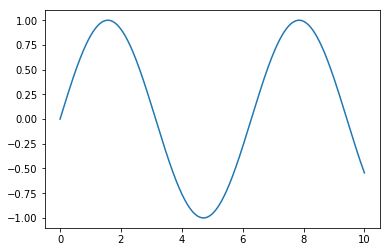

In [2]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

plt.plot(x, y)

Matplotlib поддерживает несколько различных стилей отрисовки графиков, про которые можно почитать в [документации](https://matplotlib.org/users/customizing.html)

In [3]:
plt.style.use('ggplot')

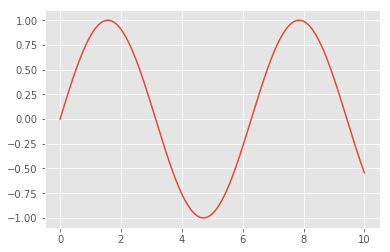

In [4]:
plt.plot(x, y)

In [5]:
plt.style.available  # все доступные стили

['seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'bmh',
 '_classic_test',
 'seaborn-colorblind',
 'Solarize_Light2',
 'seaborn-pastel',
 'grayscale',
 'seaborn-dark',
 'dark_background',
 'seaborn-ticks',
 'seaborn',
 'fast',
 'classic',
 'seaborn-bright',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-poster',
 'ggplot']

### Немного "линейных" графиков

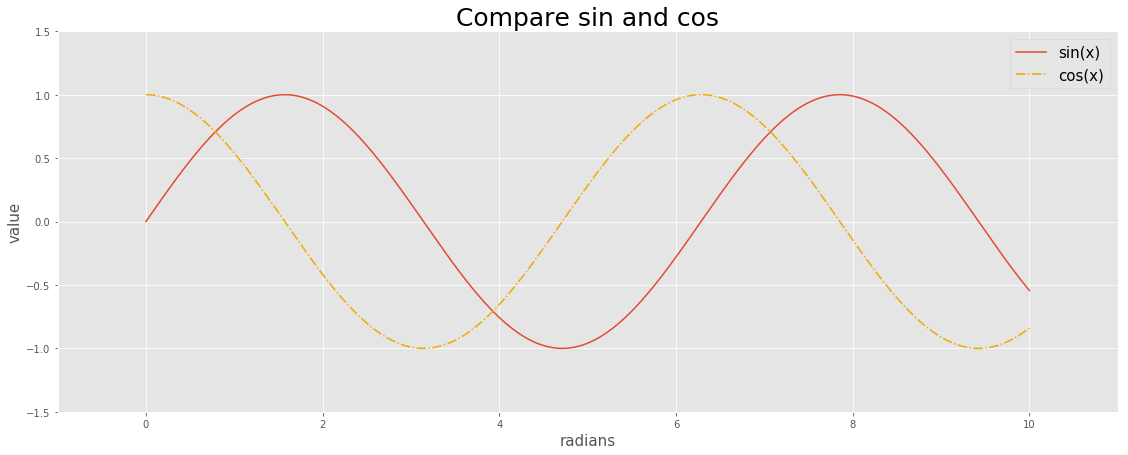

In [6]:
fig = plt.figure(figsize=(19,7))
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)', color='#F0AA00', linestyle='-.', )

ax.legend(loc='best', prop={'size': 15})
ax.set_xlabel('radians', size=15)
ax.set_ylabel('value', size=15)
ax.set_title('Compare sin and cos', size=25)
ax.set_xlim(-1, 11)   
ax.set_ylim(-1.5, 1.5)    # можно поменять пределы местами и будет зеркальное отображение

fig.savefig('my_plot.png')  # сохраняем в файлик

### Диаграммы рассеяния (scatter)

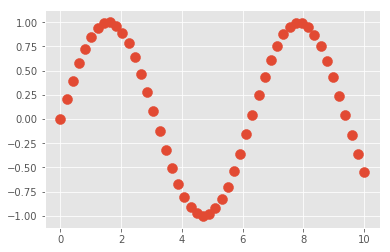

In [7]:
def draw_scatter():
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 50)
    ax.scatter(x, np.sin(x), marker='o', s=100)  # вместо ax.plot
    
draw_scatter()

# ?plt.scatter

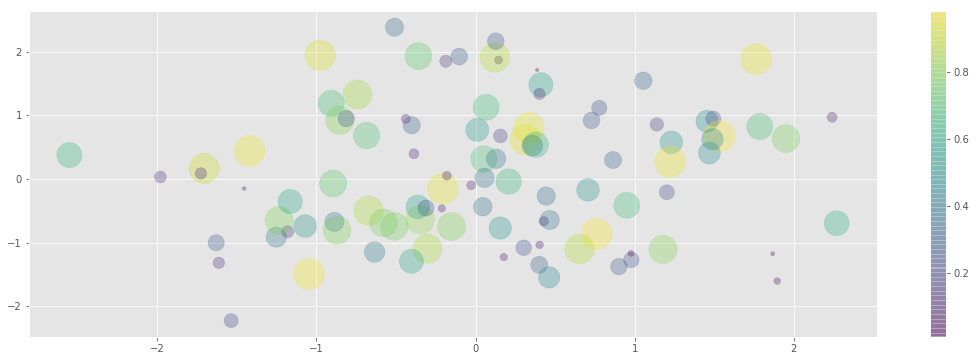

In [8]:
def draw_beauty_scatter():
    # создаем 100 рандомных координат
    rng = np.random.RandomState(0)
    x = rng.randn(100)
    y = rng.randn(100)
    
    # выбираем "цвета" и размеры наших точек
#     colors = rng.rand(100)
    sizes = 1000 * rng.rand(100)
    colors = sizes / 1000
    
    # рисуем красивую картинку
    plt.figure(figsize=(19, 6))
    plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
                cmap='viridis')
    plt.colorbar()  # цветовая панель справа
    
draw_beauty_scatter()

### Что лучше: plot или scatter?
При небольших объемах данных это не играет роли, но при наборах данных, превышающих несколько тысяч точек, **функция plt.plot может оказаться намного эффективнее plt.scatter**. Поскольку plt.scatter умеет визуализировать различные размеры и цвета каждой точки, визуализатору приходится выполнять дополнительную работу по формированию каждой точки в отдельности. В случае же функции plt.plot все точки одинаковые, поэтому работа по определению внешнего вида точек выполняется только один раз для всего набора данных. Для больших наборов данных это различие может приводить к коренным различиям в производительности, поэтому в таком случае следует использовать функцию plt.plot, а не plt.scatter.

### Что еще умеет matplotlib?
Очень-очень-очень много всего:
* погрешности: plt.errorbar
* заливка частей графиков: plt.fill_between
* контурные графики: plt.contour и plt.contourf
* отображение изображений: plt.imshow 
* гистограммы: plt.hist, plt.hist2d и plt.hexbin

А если это все объединять и активно использовать параметры, то можно построить абсолютно любой график (ограничений почти нет). Главное - найти документацию и суметь разобраться в ней (на деле это может оказаться не так просто, как кажется).

### Несколько графиков на одном рисунке
Есть два способа: извращенный (через параметры plt.axes) и нормальный. Первый мы рассматривать не будем, но если вам понадобится что-то неординарное, то он позволит нарисовать почти что угодно.

Text(0.5,0.5,'1')

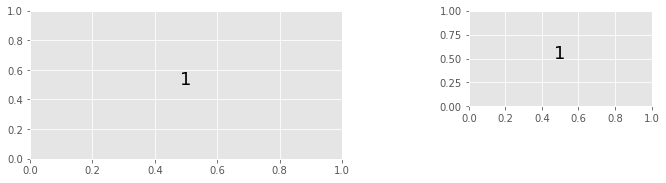

In [9]:
fig = plt.figure(figsize=(19, 6))

ax1 = fig.add_subplot(2, 3, 1) 
ax2 = fig.add_subplot(3, 5, 3) 

ax1.text(0.5, 0.5, '1',
                fontsize=18, ha='center')
ax2.text(0.5, 0.5, '1',
                fontsize=18, ha='center')

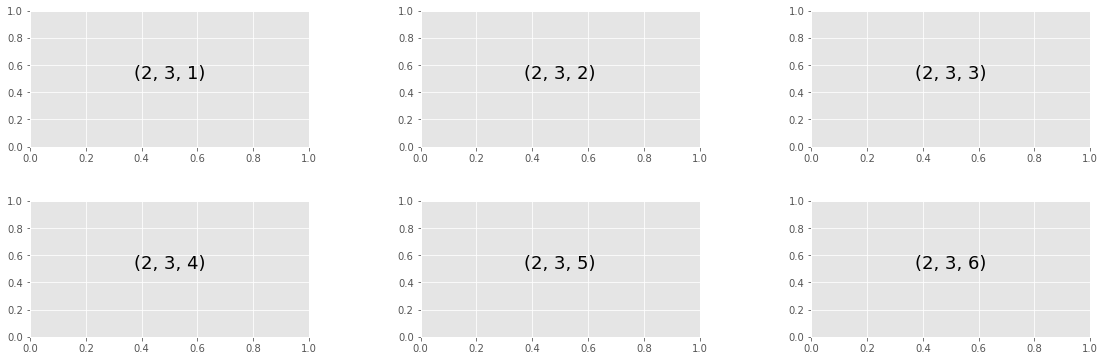

In [10]:
def draw_subplots():
    fig = plt.figure(figsize=(19, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # добавляем расстояние между графиками
    for i in range(1, 7):
        ax = fig.add_subplot(2, 3, i)      # (2, 3) - это размер "таблицы", i - позиция
        ax.text(0.5, 0.5, str((2, 3, i)),
                fontsize=18, ha='center')  # добавляем красоты
    
draw_subplots()

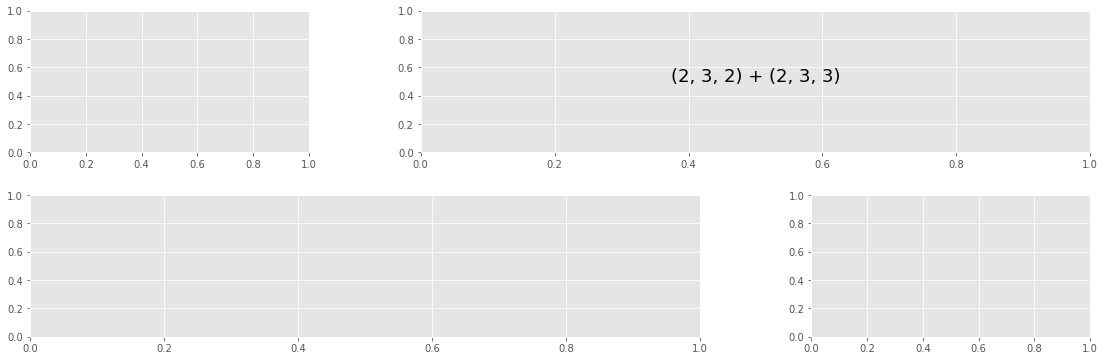

In [11]:
def draw_hard_subplots():
    fig = plt.figure(figsize=(19, 6))
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0])
    ax = plt.subplot(grid[0, 1:])
    ax.text(0.5, 0.5, "(2, 3, 2) + (2, 3, 3)",
                fontsize=18, ha='center')
    plt.subplot(grid[1, :2])
    plt.subplot(grid[1, 2]);
    
draw_hard_subplots()